# **Stack Overflow Data Analysis 2024: Trends, Technologies, and Developer Preferences**

### *By: Irfansyah Aswaly*

## **1. Introduction**

This project aims to analyze the Stack Overflow Annual Developer Survey 2024 dataset. This dataset contains responses from more than 65,000 developers about coding, jobs, AI, and other topics. The analysis will focus on data exploration, descriptive statistics, and visualization of key trends.

## **2. Dataset Preparation**

### **2.1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2.2 Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv("survey_results_public.csv")
df_schema = pd.read_csv("survey_results_schema.csv")

### **2.3 Viewing Dataset Structure**

In [3]:
# General information of the dataset
df.info()
# Display the first few rows
display(df.head())
# Show number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
# Show column list
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


The dataset has 65437 rows and 114 columns.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

## **3. Exploratory Data Analysis (EDA)**

### **3.1 Checking for Missing Data**

In [4]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
df_missing = pd.DataFrame({"Total Missing": missing_values, "Percentage": missing_percentage})
display(df_missing[df_missing["Total Missing"] > 0])

,Total Missing,Percentage
AINextMuch less integrated,64289,98.245641
AINextLess integrated,63082,96.401119
AINextNo change,52939,80.900714
AINextMuch more integrated,51999,79.464217
EmbeddedAdmired,48704,74.428840
...,...,...
YearsCode,5568,8.508948
NEWSOSites,5151,7.871693
LearnCode,4949,7.563000
EdLevel,4653,7.110656


### **3.2 Descriptive Statistics**

In [5]:
# Descriptive statistics from numeric columns
display(df.describe())

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


## **4. Data Analysis**

### **4.1 Demographic Distribution of Respondents**

In [6]:
# Countries with the highest number of respondents
display(df["Country"].value_counts().head(10))
# Age distribution
display(df["Age"].describe())

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64

count               65437
unique                  8
top       25-34 years old
freq                23911
Name: Age, dtype: object

### **4.2 Career Trends and Experience**

In [7]:
# Most common type of work
display(df["DevType"].value_counts().head(10))
# Professional experience in coding
display(df["YearsCodePro"].describe())

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Name: count, dtype: int64

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

### **4.3 Use of Technology and AI**

In [24]:
# Most used technologies
display(df["LanguageHaveWorkedWith"].value_counts().head(10))
# Opinion about AI (Replace with relevant columns based on the latest dataset)
if "AISelect" in df.columns:
    display(df["AISelect"].value_counts())
elif "AISent" in df.columns:
    display(df["AISent"].value_counts())
# AI tools used
display(df["AIToolCurrently Using"].value_counts().head(10))

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript           1002
Python                                    832
HTML/CSS;JavaScript;PHP;SQL               503
HTML/CSS;JavaScript                       452
C#                                        452
Python;SQL                                441
Java                                      424
C#;HTML/CSS;JavaScript;SQL;TypeScript     408
JavaScript;TypeScript                     402
C#;HTML/CSS;JavaScript;SQL                357
Name: count, dtype: int64

AISelect
Yes                        37662
No, and I don't plan to    14837
No, but I plan to soon      8408
Name: count, dtype: int64

AIToolCurrently Using
Writing code;Debugging and getting help;Search for answers                                         2023
Writing code                                                                                       1957
Writing code;Search for answers                                                                    1566
Writing code;Debugging and getting help;Search for answers;Generating content or synthetic data     940
Learning about a codebase;Writing code;Debugging and getting help;Search for answers                846
Writing code;Documenting code                                                                       787
Writing code;Documenting code;Debugging and getting help;Search for answers                         722
Writing code;Search for answers;Generating content or synthetic data                                692
Writing code;Debugging and getting help                                                             683
Search for answers                        

## **5. Data Visualization**

### **5.1 Age Distribution Chart**

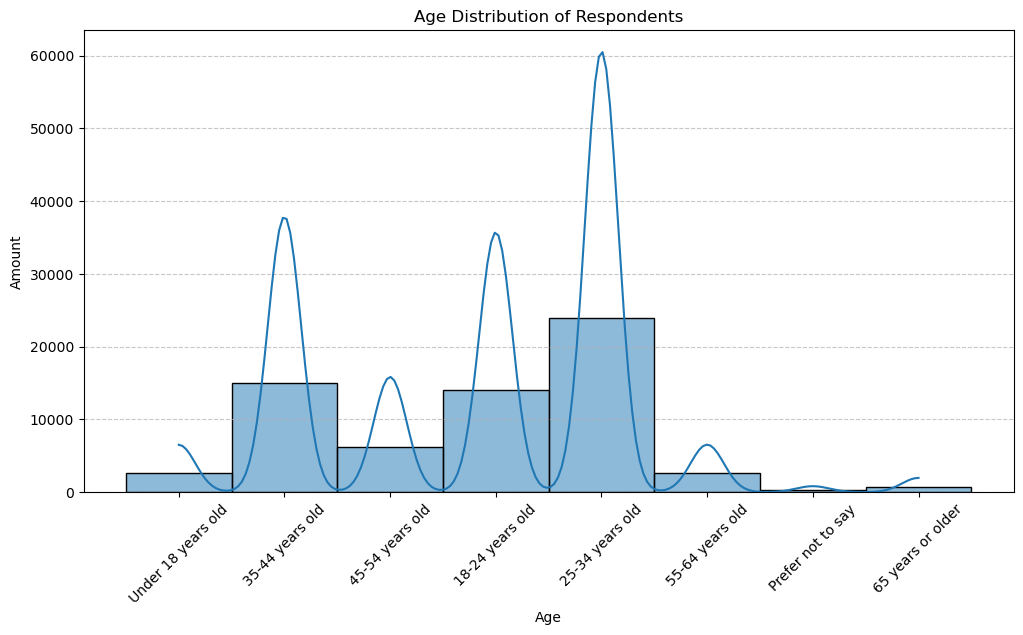

In [12]:
plt.figure(figsize=(12, 6)) # Increase plot size
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.xticks(rotation=45) # Rotate labels to make them more legible
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid for better visibility
plt.show()

### **5.2 Comparison of Trends Between Variables**

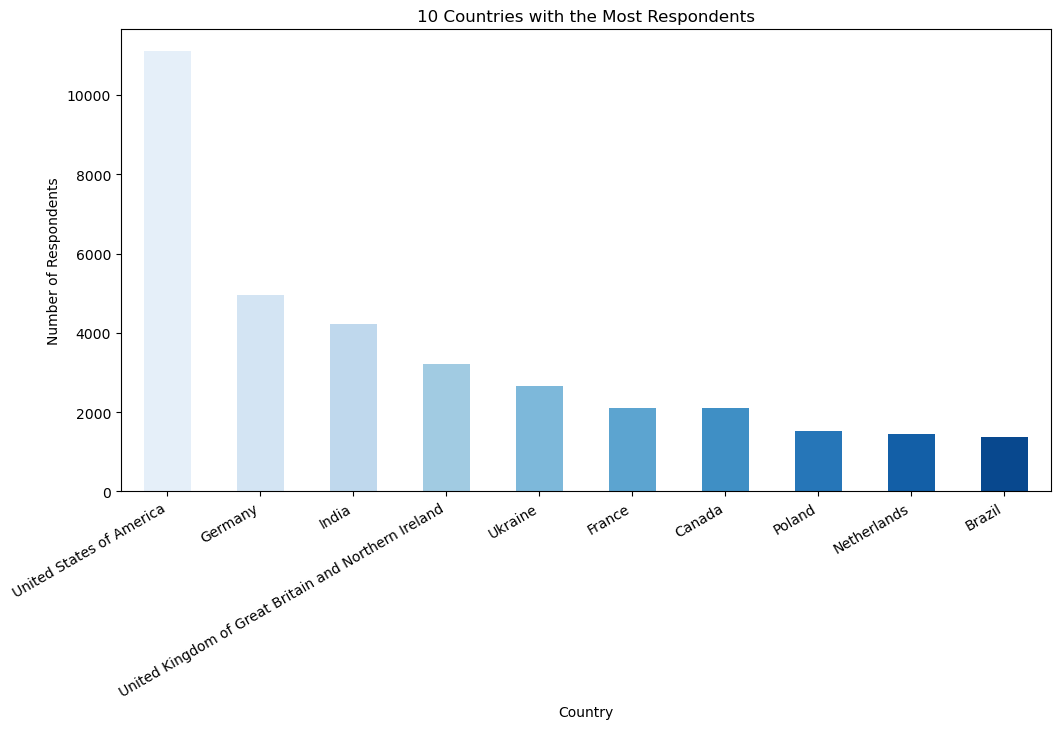

In [15]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Blues", n_colors=10)
df["Country"].dropna().value_counts().head(10).plot(kind="bar", color=colors)
plt.title("10 Countries with the Most Respondents")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30, ha='right')
plt.show()

### **5.3 Visualization of the Use of Technology and AI**

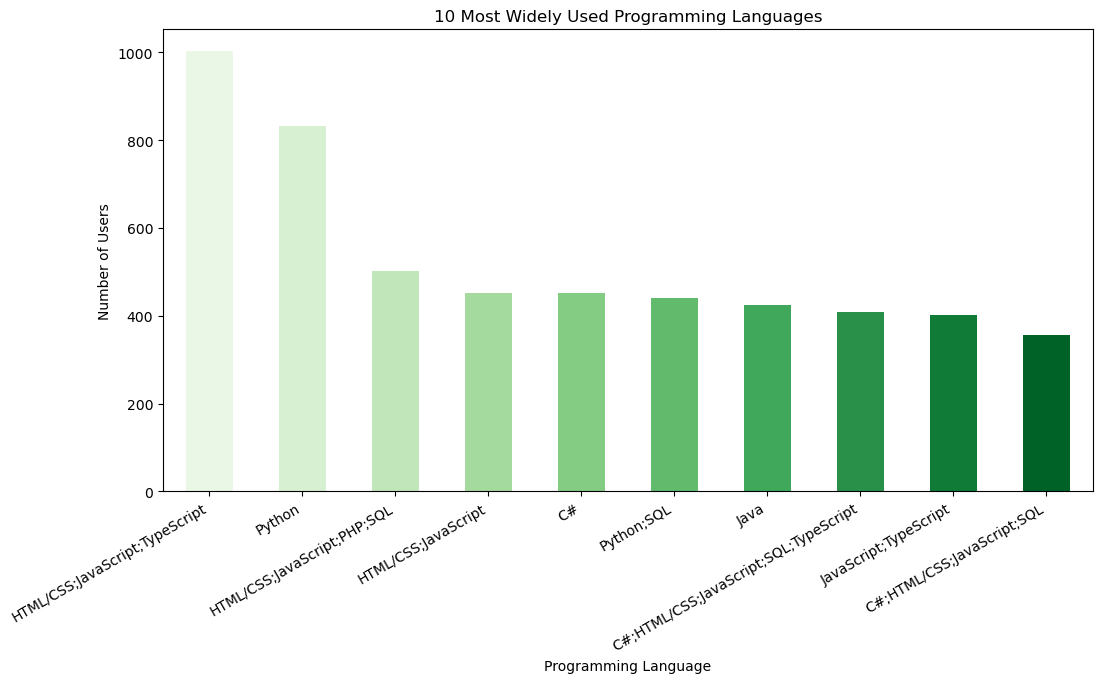

In [18]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Greens", n_colors=10)
df["LanguageHaveWorkedWith"].dropna().value_counts().head(10).plot(kind="bar", color=colors)
plt.title("10 Most Widely Used Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of Users")
plt.xticks(rotation=30, ha='right')
plt.show()

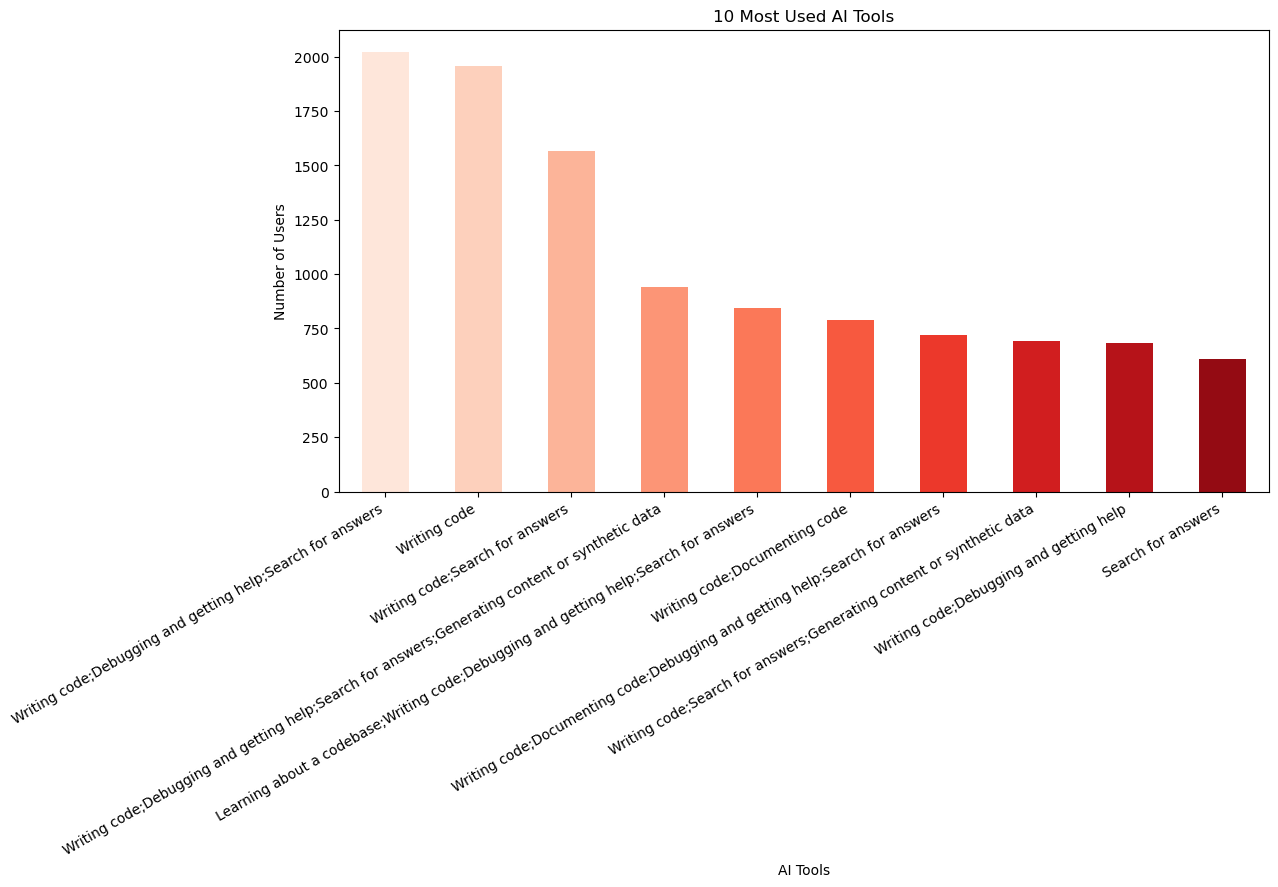

In [19]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Reds", n_colors=10)
df["AIToolCurrently Using"].dropna().value_counts().head(10).plot(kind="bar", color=colors)
plt.title("10 Most Used AI Tools")
plt.xlabel("AI Tools")
plt.ylabel("Number of Users")
plt.xticks(rotation=30, ha='right')
plt.show()

### **5.4 Visualization of Career Trends and Experience**

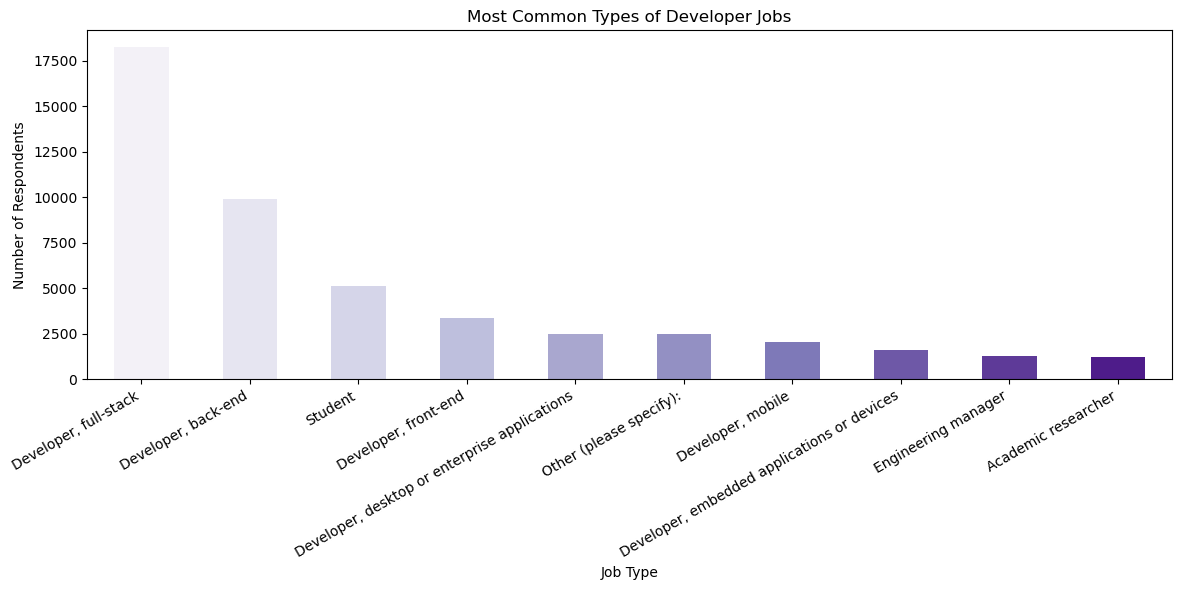

In [26]:
plt.figure(figsize=(12, 6))
devtype_counts = df["DevType"].dropna().value_counts().head(10)
devtype_counts.plot(kind="bar", color=sns.color_palette("Purples", n_colors=len(devtype_counts)))
plt.title("Most Common Types of Developer Jobs")
plt.xlabel("Job Type")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30, ha='right') # Rotate X-axis labels to avoid overlap
plt.tight_layout()
plt.show()

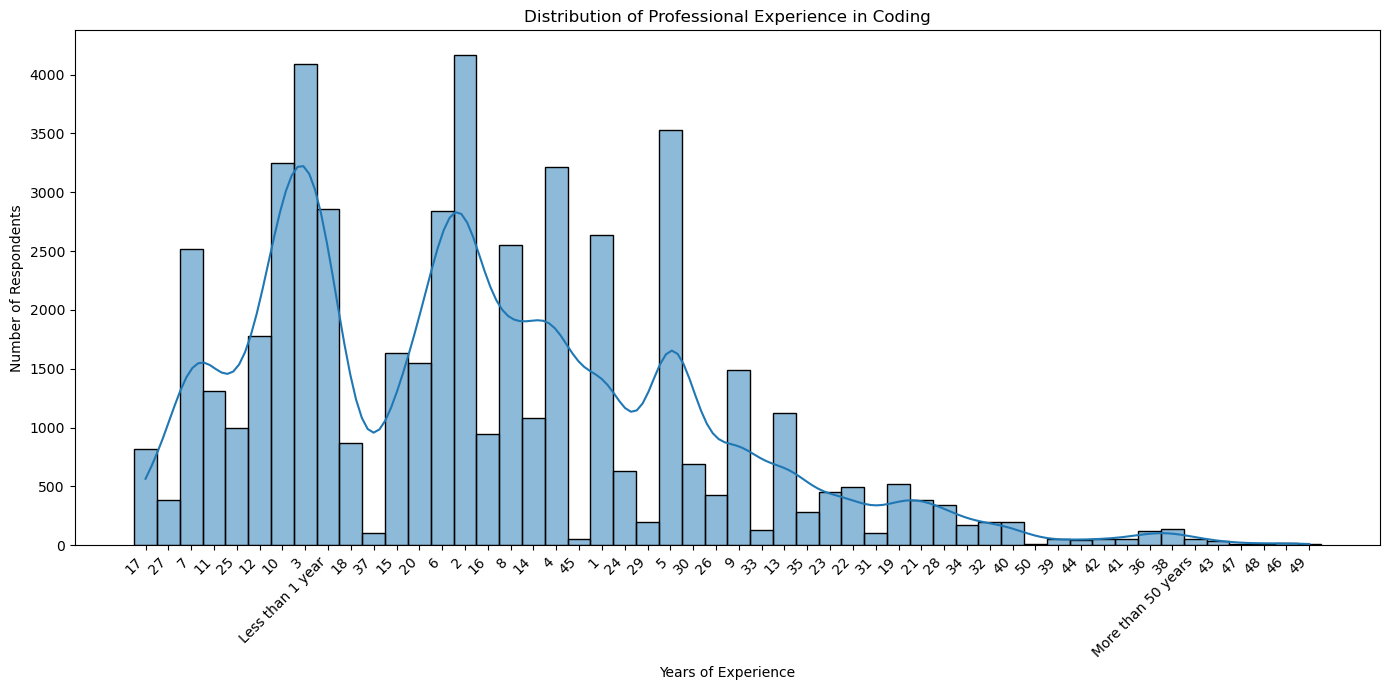

In [28]:
plt.figure(figsize=(14, 7)) # Increase the size of the graph
sns.histplot(df["YearsCodePro"].dropna(), bins=20, kde=True)
plt.title("Distribution of Professional Experience in Coding")
plt.xlabel("Years of Experience")
plt.ylabel("Number of Respondents")

# Set the rotation and distance of the X-axis labels
plt.xticks(rotation=45, ha='right') # Rotate and align labels

# Adjust the spacing between elements so they don't get cut off
plt.tight_layout()

plt.show()

## **6. Conclusion**

### Stack Overflow Data Analysis 2024: Trends, Technologies, and Developer Preferences Conclusion

1. **Demographic Distribution of Respondents**:
   - The largest number of respondents came from **United States** with a total of **11,095 participants**.
   - The largest age group is **25-34 years**.

2. **Education and Career Trends**:
   - The majority of respondents are **Developers**, especially **Full-Stack Developers** with a total of **18,260 respondents**.
   - The most years of coding experience is **2 years**.

3. **Most Used Technologies ("LanguageHaveWorkedWith")**:
   - The most popular technologies used by respondents were **HTML/CSS**, **JavaScript**, and **TypeScript**, with **1,002 respondents** using a combination of these technologies.

4. **Opinion about AI**:
   - The majority of respondents, as many as **37,662 respondents**, chose **"Yes"** supporting the use of **AI**.

5. **AI Tools Currently Being Used**:
   - The most used AI tools were for **writing code**, **debugging**, **seeking help**, and **looking for answers**, with **2,023 respondents** using these AI tools.